# Instala dependências

In [1]:
%pip install tensorflow
%pip install numpy
%pip install matplotlib
%pip install kagglehub
%pip install scikit-image

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Separa os dados de treino e teste

In [2]:
import os
import shutil
import random

# Configurações
input_dir = "datasets/veiculos"  # Diretório raiz com as pastas bike, car, motorcycle, truck
output_dir = "datasets/veiculos2"  # Diretório onde os conjuntos de treino/teste serão criados
train_ratio = 0.8  # Proporção dos dados para treino (80% treino, 20% teste)

# se existe o diretorio de saida nao continua
if os.path.exists(output_dir):
    print("Diretório de saída já existe. Se deseja regerar exclua-o e tente novamente.")
else:
    # Criar diretórios de saída
    train_dir = os.path.join(output_dir, "train")
    test_dir = os.path.join(output_dir, "test")

    for dir_path in [train_dir, test_dir]:
        os.makedirs(dir_path, exist_ok=True)

    # Separar os dados
    for category in os.listdir(input_dir):
        category_path = os.path.join(input_dir, category)

        if os.path.isdir(category_path):
            # Listar todos os arquivos da categoria
            files = [f for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

            # Embaralhar e dividir os arquivos
            random.shuffle(files)
            train_count = int(len(files) * train_ratio)

            train_files = files[:train_count]
            test_files = files[train_count:]

            # Criar diretórios específicos para a categoria
            train_category_dir = os.path.join(train_dir, category)
            test_category_dir = os.path.join(test_dir, category)

            os.makedirs(train_category_dir, exist_ok=True)
            os.makedirs(test_category_dir, exist_ok=True)

            # Mover os arquivos para os diretórios correspondentes
            for file_name in train_files:
                shutil.copy(os.path.join(category_path, file_name), os.path.join(train_category_dir, file_name))
            
            for file_name in test_files:
                shutil.copy(os.path.join(category_path, file_name), os.path.join(test_category_dir, file_name))

    print("Separação concluída. Dados armazenados em:", output_dir)


Diretório de saída já existe. Se deseja regerar exclua-o e tente novamente.


# Preparação do dado

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
path = 'datasets/veiculos2/'
train_ds = os.path.join(path, "train")
test_ds = os.path.join(path, "test")

os.listdir(train_ds)

['car', '.DS_Store', 'bike', 'motorcycle', 'truck']

In [4]:
classes = [f for f in os.listdir(train_ds) if not f.startswith('.')]
classes

['car', 'bike', 'motorcycle', 'truck']

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(train_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory(test_ds, target_size=(150, 150), batch_size=32, class_mode='categorical')

Found 92 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


In [7]:
train_generator[0][0].shape

(32, 150, 150, 3)

In [8]:
test_generator[0][0].shape

(28, 150, 150, 3)

In [9]:
print(len(train_generator))
print(len(test_ds))

3
23


In [10]:
train_generator.class_indices

{'bike': 0, 'car': 1, 'motorcycle': 2, 'truck': 3}

# Exemplos de imagens usadas no treino

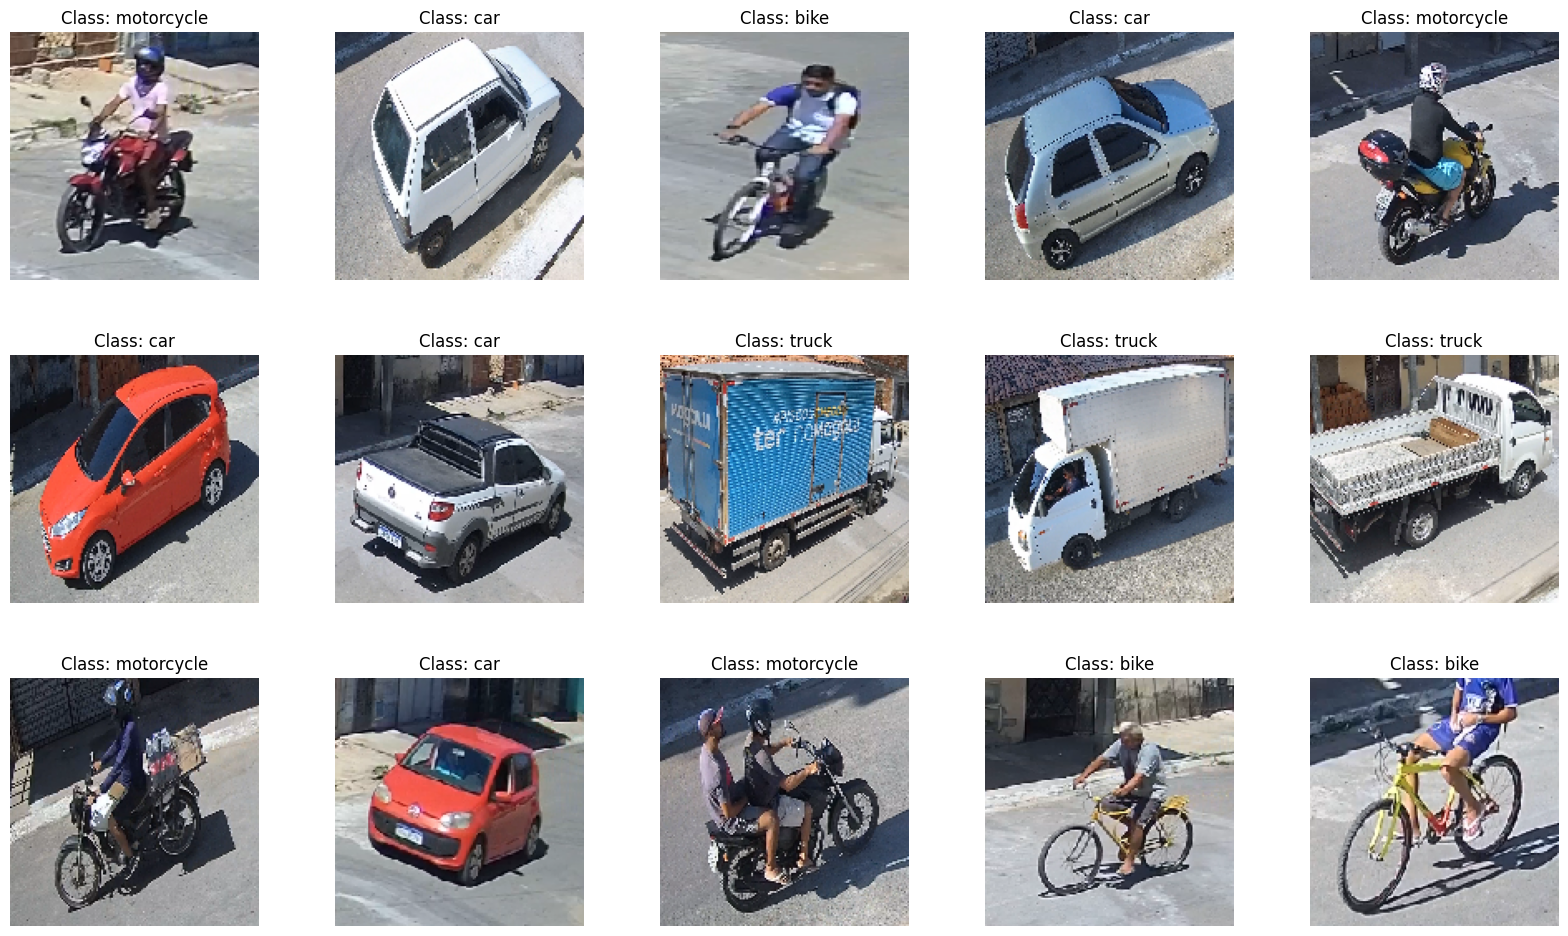

In [11]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")


# Criando modelo de rede neural

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, BatchNormalization

seq_model = Sequential([ 
    Flatten(input_shape=(150, 150, 3), name='input_layer_1'),
    Dense(128, name='layer1'),
    BatchNormalization(name='batch_norm_1'),  # Adicionando Batch Normalization
    Dropout(0.2),
    Dense(64, name='layer2'),
    BatchNormalization(name='batch_norm_2'),  # Adicionando Batch Normalization
    Dropout(0.2),
    Dense(32, name='layer3'),
    BatchNormalization(name='batch_norm_3'),  # Adicionando Batch Normalization
    
    Dense(4, activation='softmax', name='output_layer')
])


/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Deep Leaning/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
seq_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (Flatten)         │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,651,492 (33.00 MB)

 Trainable params: 8,651,044 (33.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [15]:
from tensorflow.keras.optimizers import Adam

seq_model.compile(optimizer=Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [16]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 150, 150, 3)
(32, 4)


In [17]:
history_1 = seq_model.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator,
                   )

/Users/clairtonluz/projects/personal/MBA-em-ciencia-de-dados/Deep Leaning/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 598ms/step - accuracy: 0.3492 - loss: 1.5164 - val_accuracy: 0.2500 - val_loss: 167.6825
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.6807 - loss: 0.7482 - val_accuracy: 0.2500 - val_loss: 78.6912
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 392ms/step - accuracy: 0.7913 - loss: 0.5301 - val_accuracy: 0.2500 - val_loss: 110.9176
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 455ms/step - accuracy: 0.8271 - loss: 0.4644 - val_accuracy: 0.2857 - val_loss: 82.8247
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 407ms/step - accuracy: 0.8606 - loss: 0.4328 - val_accuracy: 0.4643 - val_loss: 41.9291
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 432ms/step - accuracy: 0.8546 - loss: 0.4099 - val_accuracy: 0.4643 - val_loss: 40.6016
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 469ms/step - accuracy: 0.8437 - loss: 0.4000 - val_accuracy: 0.5000 - val_loss: 39.8602
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 472ms/step - accuracy: 0.9166 - loss: 0.2913 - val_accuracy: 0.2857 - 

In [18]:
import pandas as pd

results = pd.DataFrame(history_1.history)
results.tail()

,accuracy,loss,val_accuracy,val_loss
25,0.978261,0.048700,0.714286,2.449307
26,0.989130,0.123054,0.571429,4.313020
27,1.000000,0.025301,0.535714,6.892002
28,0.989130,0.039231,0.535714,7.424075
29,0.978261,0.068235,0.571429,5.966761


In [20]:
def plotLoss(history):
    plt.figure(figsize=(15,6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['Train','Val'], loc= 'upper left')
    plt.show()

def plotAccuracy(history):
    plt.figure(figsize=(15,6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epochs')
    plt.legend(['Train','Val'], loc= 'upper left')
    plt.show()


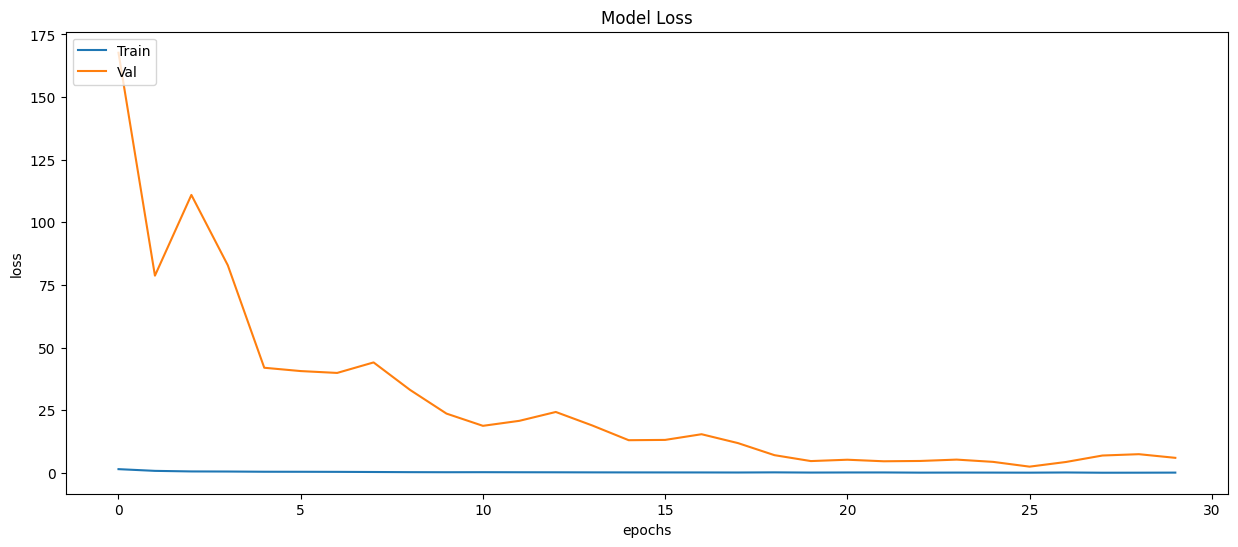

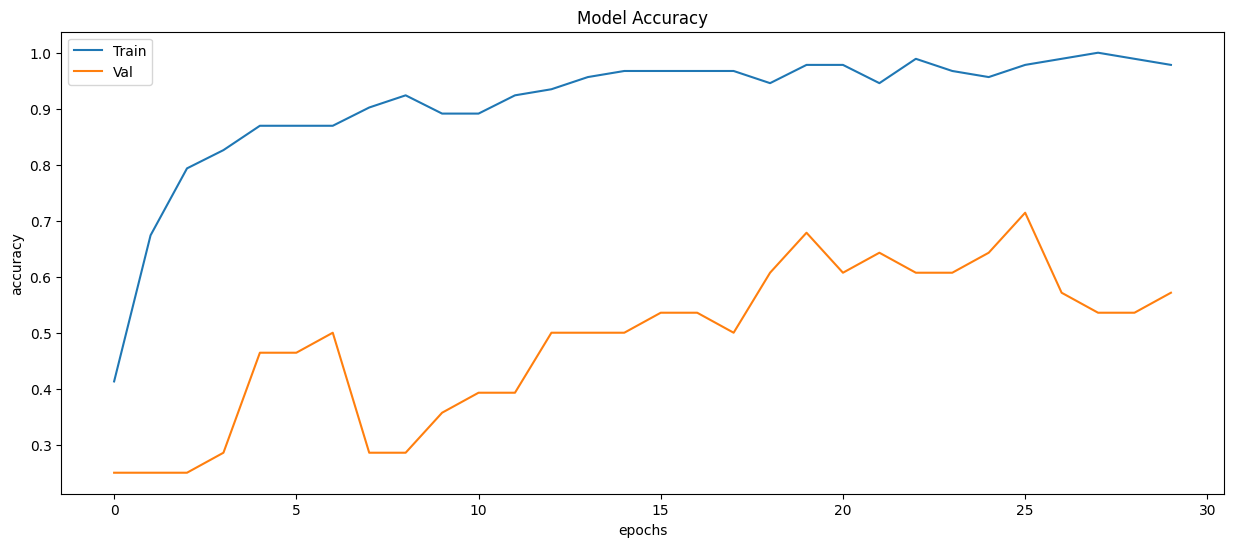

In [21]:
plotLoss(history_1)
plotAccuracy(history_1)

In [22]:
y_test_1 = test_generator.classes
y_pred_1 =seq_model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


In [23]:
results_1 = seq_model.evaluate(test_generator)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.5714 - loss: 5.9668


In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1,y_pred_1,target_names = labels))

              precision    recall  f1-score   support

        bike       0.28      0.71      0.40         7
         car       0.38      0.43      0.40         7
  motorcycle       0.00      0.00      0.00         7
       truck       1.00      0.14      0.25         7

    accuracy                           0.32        28
   macro avg       0.41      0.32      0.26        28
weighted avg       0.41      0.32      0.26        28



In [26]:
# treine um novo modelo usando a rede VGG16
from tensorflow.keras.applications import VGG16

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

for layer in vgg_model.layers:
    layer.trainable = False
    
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [27]:
model_2 = Sequential([
    vgg_model,
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(name='batch_norm_1'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(name='batch_norm_2'), 
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(name='batch_norm_3'), 
    Dropout(0.2),
    Dense(4, activation='softmax'),
    Dense(4, activation='softmax', name='output_layer')
])

model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,774,776 (60.18 MB)

 Trainable params: 1,059,640 (4.04 MB)

 Non-trainable params: 14,715,136 (56.13 MB)

In [28]:
model_2.compile(optimizer=Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [29]:
history_2 = model_2.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator,
                   )

results_2 = pd.DataFrame(history_2.history)
results_2.tail()

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.2970 - loss: 1.4023 - val_accuracy: 0.3571 - val_loss: 1.3506
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.4922 - loss: 1.2435 - val_accuracy: 0.2857 - val_loss: 1.3823
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.5769 - loss: 1.1798 - val_accuracy: 0.2500 - val_loss: 1.3609
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.6736 - loss: 1.1061 - val_accuracy: 0.2857 - val_loss: 1.2968
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7235 - loss: 1.0433 - val_accuracy: 0.3571 - val_loss: 1.2556
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7211 - loss: 1.0072 - val_accuracy: 0.3929 - val_loss: 1.2276
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7352 - loss: 0.9643 - val_accuracy: 0.3929 - val_loss: 1.2028
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.7250 - loss: 0.9535 - val_accuracy: 0.4286 - val_loss: 1.1860
Epoch 9/30
3/3 ━

,accuracy,loss,val_accuracy,val_loss
25,0.75000,0.618777,0.750000,0.646787
26,0.73913,0.609438,0.750000,0.640734
27,0.75000,0.598414,0.785714,0.634711
28,0.75000,0.588512,0.785714,0.628049
29,0.75000,0.580583,0.785714,0.620794


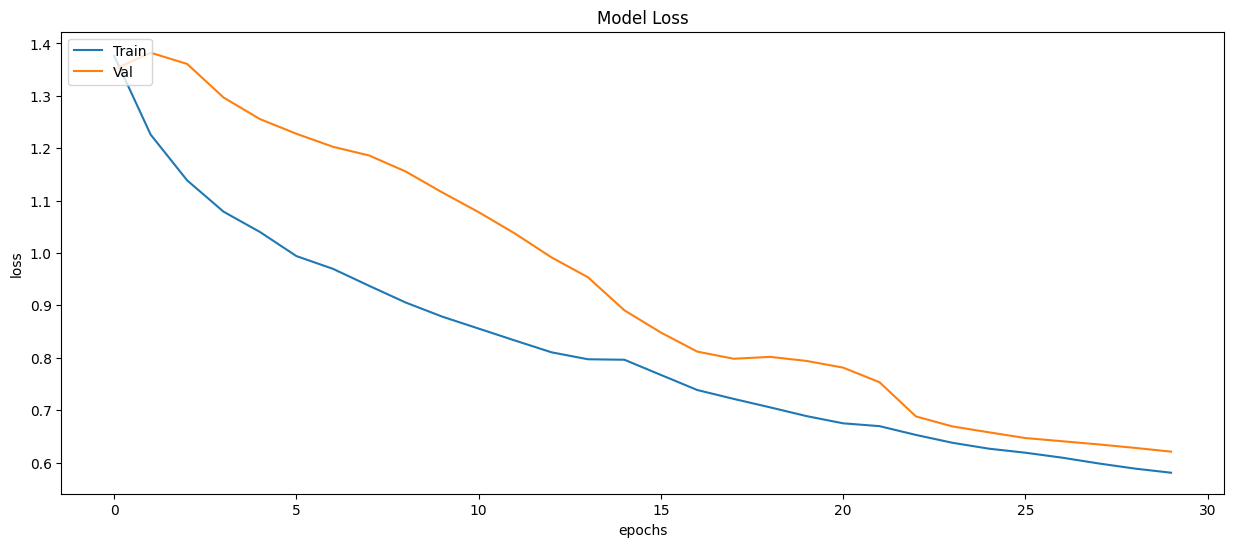

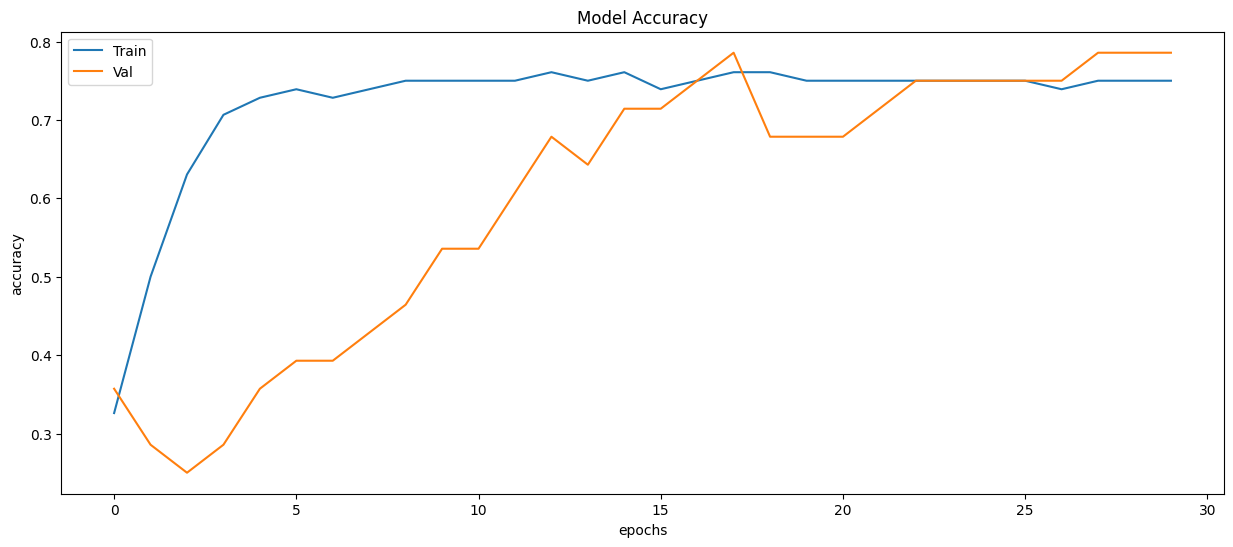

In [30]:
plotLoss(history_2)
plotAccuracy(history_2)


In [31]:
y_test_2 = test_generator.classes
y_pred_2 = model_2.predict(test_generator)
y_pred_2 = np.argmax(y_pred_2,axis=1)

results_2 = model_2.evaluate(test_generator)

print(classification_report(y_test_2,y_pred_2,target_names = labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7857 - loss: 0.6208
              precision    recall  f1-score   support

        bike       0.17      0.29      0.21         7
         car       0.00      0.00      0.00         7
  motorcycle       0.29      0.29      0.29         7
       truck       0.25      0.29      0.27         7

    accuracy                           0.21        28
   macro avg       0.18      0.21      0.19        28
weighted avg       0.18      0.21      0.19        28



In [32]:
# treine um novo modelo usando a rede ResNet50
from tensorflow.keras.applications import ResNet50

resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150,150,3))

for layer in resnet_model.layers:
    layer.trainable = False
    
resnet_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_3[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
model_3 = Sequential([
    resnet_model,
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(name='batch_norm_1'), 
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(name='batch_norm_2'), 
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(name='batch_norm_3'), 
    Dropout(0.2),
    Dense(4, activation='softmax'),
    Dense(4, activation='softmax', name='output_layer')
])

model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 5, 5, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_1                    │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_2                    │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm_3                    │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 4)              │            20 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,152,824 (115.02 MB)

 Trainable params: 6,564,664 (25.04 MB)

 Non-trainable params: 23,588,160 (89.98 MB)

In [ ]:
model_3.compile(optimizer=Adam(learning_rate=0.01),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_3 = model_3.fit(train_generator,
                    epochs=30,
                    validation_data=test_generator,
                   )

results_3 = pd.DataFrame(history_3.history)
results_3.tail()

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2655 - loss: 1.3932 - val_accuracy: 0.2500 - val_loss: 1.3861
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5202 - loss: 1.2871 - val_accuracy: 0.2500 - val_loss: 1.4075
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5294 - loss: 1.2596 - val_accuracy: 0.2500 - val_loss: 1.4119
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7883 - loss: 1.2156 - val_accuracy: 0.2500 - val_loss: 1.4177
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8143 - loss: 1.1736 - val_accuracy: 0.2500 - val_loss: 1.4250
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.8370 - loss: 1.1340 - val_accuracy: 0.2500 - val_loss: 1.4343
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8115 - loss: 1.0927 - val_accuracy: 0.2500 - val_loss: 1.4434
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.8536 - loss: 1.0807 - val_accuracy: 0.2500 - val_loss: 1.4528
Epoch 9/30
3/3 ━

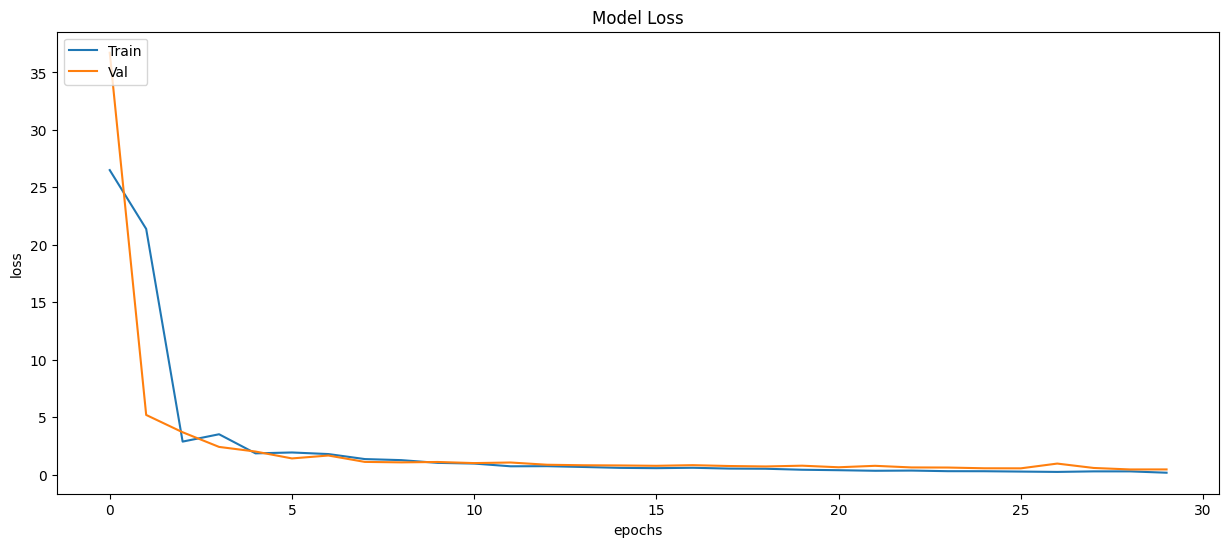

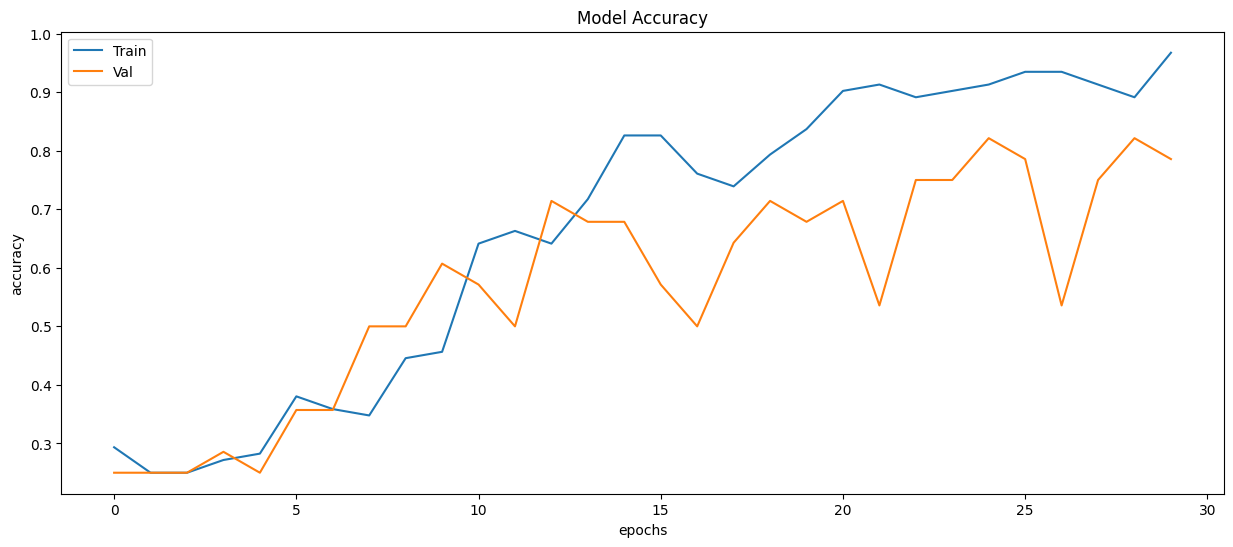

In [ ]:
plotLoss(history_3)
plotAccuracy(history_3)

In [ ]:
y_test_3 = test_generator.classes
y_pred_3 = model_3.predict(test_generator)
y_pred_3 = np.argmax(y_pred_3,axis=1)

results = model_3.evaluate(test_generator)

print(classification_report(y_test_3,y_pred_3,target_names = labels))

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7857 - loss: 0.4602
              precision    recall  f1-score   support

        bike       0.25      0.43      0.32         7
         car       0.00      0.00      0.00         7
  motorcycle       0.33      0.14      0.20         7
       truck       0.29      0.29      0.29         7

    accuracy                           0.21        28
   macro avg       0.22      0.21      0.20        28
weighted avg       0.22      0.21      0.20        28



In [ ]:
# faça um benchmark entre os modelos
from sklearn.metrics import accuracy_score

print("Acurácia do modelo sequencial: ", accuracy_score(y_test_1, y_pred_1))
print("Acurácia do modelo VGG16: ", accuracy_score(y_test_2, y_pred_2))
print("Acurácia do modelo ResNet50: ", accuracy_score(y_test_3, y_pred_3))


Acurácia do modelo sequencial:  0.25
Acurácia do modelo VGG16:  0.25
Acurácia do modelo ResNet50:  0.21428571428571427


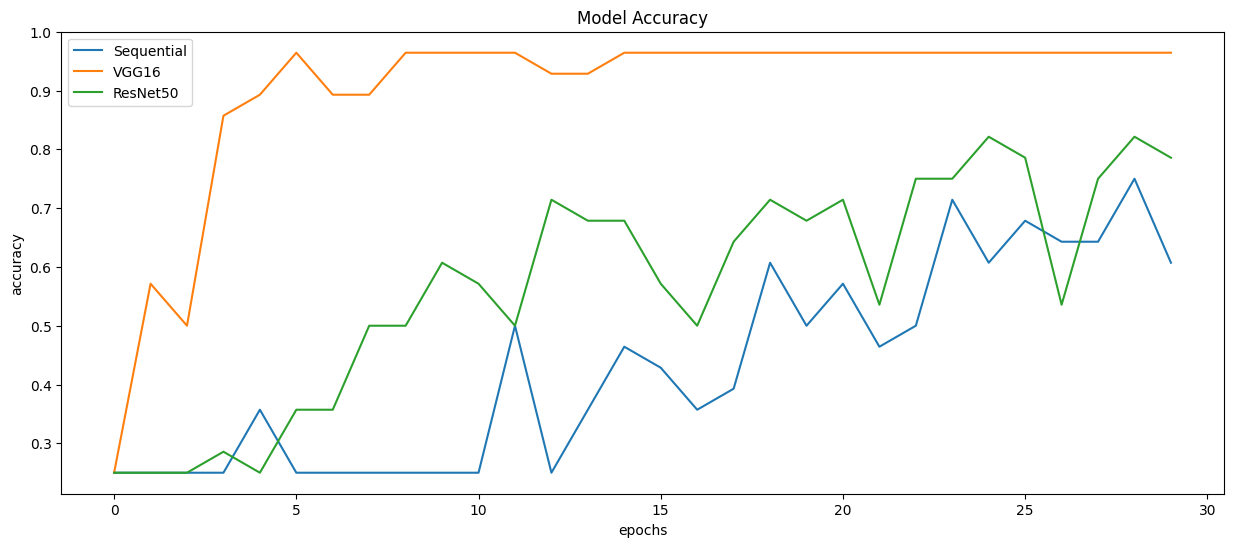

In [ ]:
# grafico comparativo entre accuracy dos modelos
plt.figure(figsize=(15,6))
plt.plot(history_1.history['val_accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['Sequential','VGG16','ResNet50'], loc= 'upper left')
plt.show()

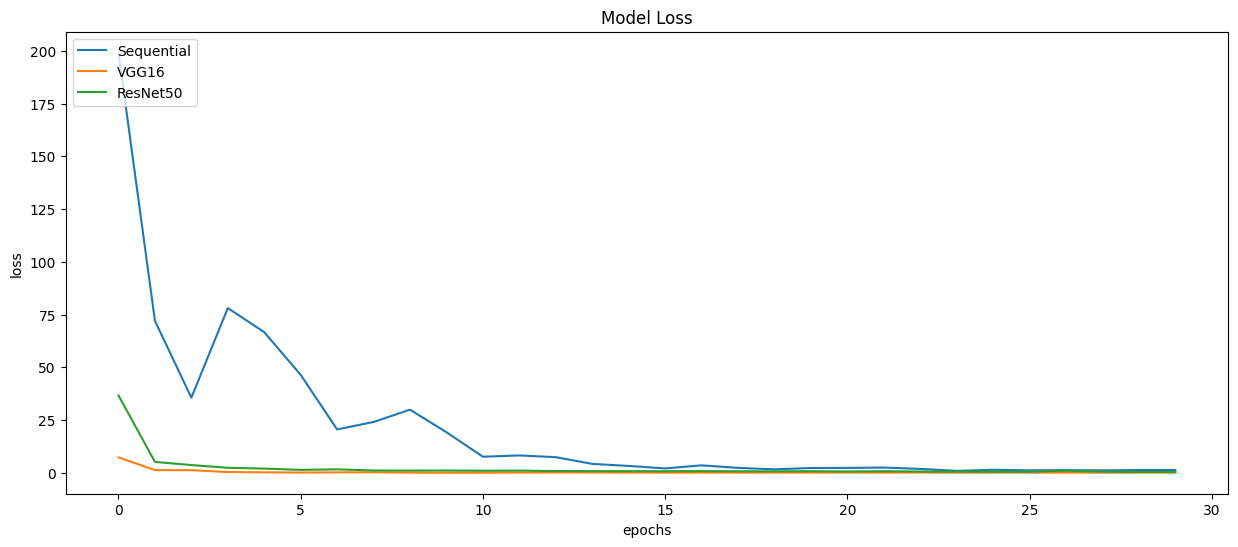

In [ ]:
# grafico comparativo entre loss dos modelos
plt.figure(figsize=(15,6))
plt.plot(history_1.history['val_loss'])
plt.plot(history_2.history['val_loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Sequential','VGG16','ResNet50'], loc= 'upper left')
plt.show()